In [2]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wrf
from wrf import getvar, vinterp, ALL_TIMES, destagger, to_np

In [3]:
directory1='/mnt/sda2/exp4_llj/'
directory2='/media/rello/winBak/exp2_201303_sodar/'

In [4]:
model='ds083'
run='s1p1_nosst'
rtimes='20130301'
dirs = 'exp4_llj/'
f = directory1+model+'_'+run+'_'+rtimes+'.nc'
print(f)

/mnt/sda2/exp4_llj/ds083_s1p1_nosst_20130301.nc


In [5]:
ds = Dataset(f)
uv, wdir = getvar(ds, "uvmet_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
tvv = getvar(ds, "tv", units="degC", timeidx=ALL_TIMES)
tvv.shape

(433, 29, 119, 119)

In [6]:
tvv[0,0,51,41]
#XLONG    float32 -103.773
#XLAT     float32 19.2801

<xarray.DataArray 'tv' ()>
array(29.1519775390625, dtype=float32)
Coordinates:
    XLONG    float32 -103.715
    XLAT     float32 19.2721
    XTIME    float32 0.0
    Time     datetime64[ns] 2013-03-01T18:00:00
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  virtual temperature
    units:        degC
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   LambertConformal(stand_lon=-102.0, moad_cen_lat=20.00000762...

In [7]:
# Interpolate levels
interp_levels = [.020, .030, .040, .050, .100, .150, .200,
                 .250, .300, .350, .400]

interp_uv = vinterp(ds, field=uv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type='z')

interp_wdir = vinterp(ds, field=wdir, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type="z")

interp_tv = vinterp(ds, field=tvv, vert_coord='ght_agl', interp_levels=interp_levels,
                    timeidx=ALL_TIMES, field_type="z")

interp_uv.shape

(433, 11, 119, 119)

In [8]:
wrftime = getvar(ds, "times", timeidx=ALL_TIMES)
utc2loc = np.timedelta64(6,'h')
wrftimes = pd.to_datetime(wrftime[::3].values)-utc2loc
date1, date2 = wrftimes[0], wrftimes[wrftimes.size-1]
print(wrftimes.size, date1, date2)

145 2013-03-01 12:00:00 2013-03-04 12:00:00


In [9]:
timelabel = wrftimes
print(timelabel[0], timelabel[144])

2013-03-01 12:00:00 2013-03-04 12:00:00


In [10]:
uv10, wdir10 = getvar(ds, "uvmet10_wspd_wdir", units="m s-1", timeidx=ALL_TIMES)
tv10 = getvar(ds, "tv", units="degC", timeidx=ALL_TIMES)

In [11]:
wrfuv = interp_uv[:,:,51,41];
wrfdd = interp_wdir[:,:,51,41];
wrftv = interp_tv[:,:,51,41];
dd = pd.read_pickle('sodar_dd.pk')
sp = pd.read_pickle('sodar_sp.pk')
tv = pd.read_pickle('sodar_tv.pk')

In [12]:
w10 = uv10[:,0].resample(Time="30Min").mean().values
t10 = tv10[:,0].resample(Time="30Min").mean().values
w20 = wrfuv[:,0].resample(Time="30Min").mean().values
t20 = wrftv[:,0].resample(Time="30Min").mean().values
w30 = wrfuv[:,1].resample(Time="30Min").mean().values
t30 = wrftv[:,1].resample(Time="30Min").mean().values
w40 = wrfuv[:,2].resample(Time="30Min").mean().values
t40 = wrftv[:,2].resample(Time="30Min").mean().values
w50 = wrfuv[:,3].resample(Time="30Min").mean().values
t50 = wrftv[:,3].resample(Time="30Min").mean().values
w100 = wrfuv[:,4].resample(Time="30Min").mean().values
t100 = wrftv[:,4].resample(Time="30Min").mean().values
w150 = wrfuv[:,5].resample(Time="30Min").mean().values
t150 = wrftv[:,5].resample(Time="30Min").mean().values
w200 = wrfuv[:,6].resample(Time="30Min").mean().values 
t200 = wrftv[:,6].resample(Time="30Min").mean().values 
w250 = wrfuv[:,7].resample(Time="30Min").mean().values 
t250 = wrftv[:,7].resample(Time="30Min").mean().values 
w300 = wrfuv[:,8].resample(Time="30Min").mean().values 
t300 = wrftv[:,8].resample(Time="30Min").mean().values 
w350 = wrfuv[:,9].resample(Time="30Min").mean().values
t350 = wrftv[:,9].resample(Time="30Min").mean().values
w400 = wrfuv[:,10].resample(Time="30Min").mean().values
t400 = wrftv[:,10].resample(Time="30Min").mean().values

In [13]:
wrftv2=[t10, t20, t30, t40, t50, t100, t150, t200, t250, t300, t350, t400]
wrfuv2=[w10, w20, w30, w40, w50, w100, w150, w200, w250, w300, w350, w400]
#fig = plt.contourf(wrftv2)
#plt.colorbar(fig)

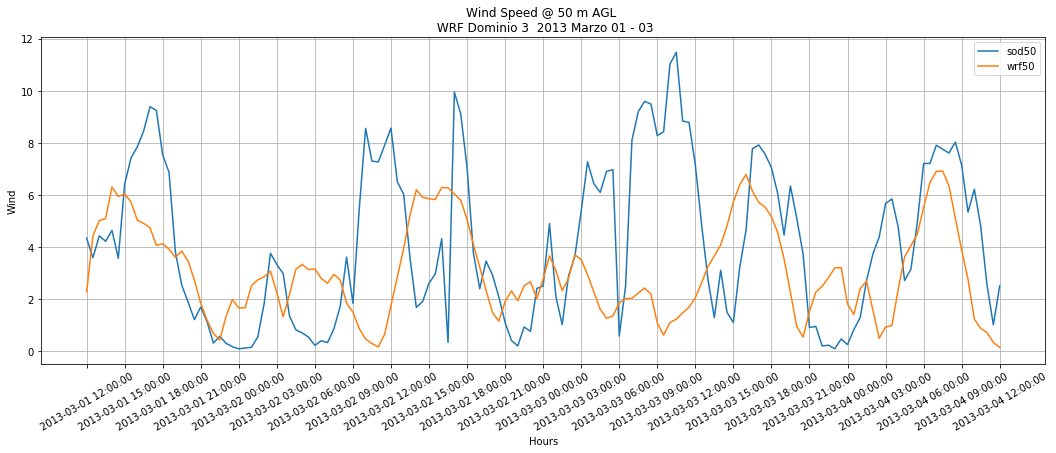

In [14]:
fig = plt.figure(figsize=[18,6])
s50 = sp['spd_50']['2013-03-01 12:00':'2013-03-04 12:00'].values
plt.plot(s50, label='sod50')
plt.plot(w50, label='wrf50')

plt.title('Wind Speed @ 50 m AGL \n WRF Dominio 3  2013 Marzo 01 - 03')
plt.ylabel('Wind')
plt.xlabel('Hours')

plt.grid(True)
plt.legend()
# xticks(locs, [labels], **kwargs) 
plt.xticks(np.arange(0,timelabel.size,6),timelabel[::6], rotation=30)
plt.savefig('sodar_20130310_wrf_d03.png', dpi=400)

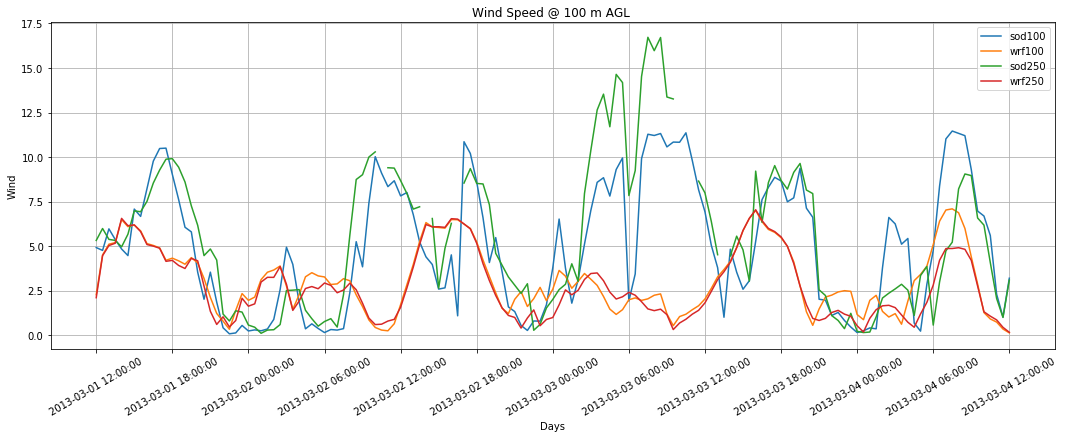

In [15]:
fig = plt.figure(figsize=[18,6])
s100 = sp['spd_100']['2013-03-01 12:00':'2013-03-04 12:00'].values
s200 = sp['spd_200']['2013-03-01 12:00':'2013-03-04 12:00'].values
s250 = sp['spd_250']['2013-03-01 12:00':'2013-03-04 12:00'].values
s300 = sp['spd_300']['2013-03-01 12:00':'2013-03-04 12:00'].values

plt.plot(s100, label='sod100')
plt.plot(w100, label='wrf100')
plt.plot(s250, label='sod250')
plt.plot(w250, label='wrf250')

plt.title('Wind Speed @ 100 m AGL ' )
plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

figname='speed100_250'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

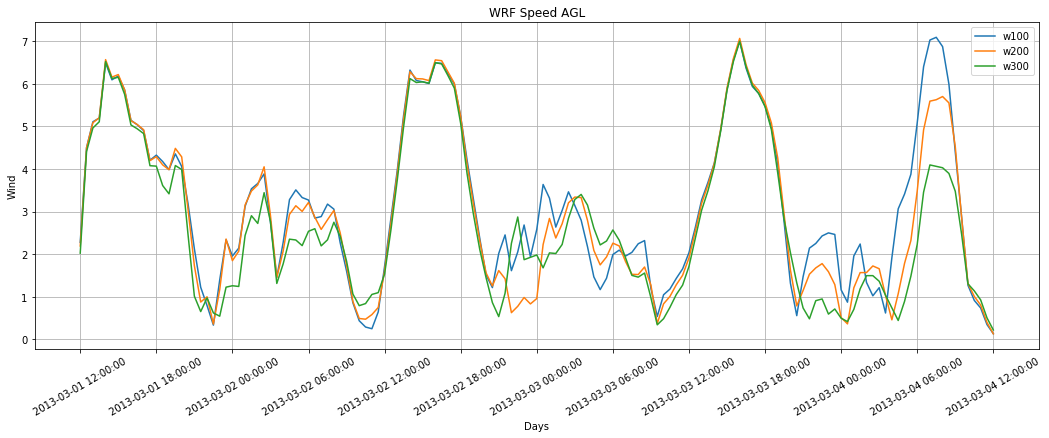

In [16]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(w100, label='w100')
plt.plot(w200, label='w200')
plt.plot(w300, label='w300')

plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.title('WRF Speed AGL')
figname='wrf_spd_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

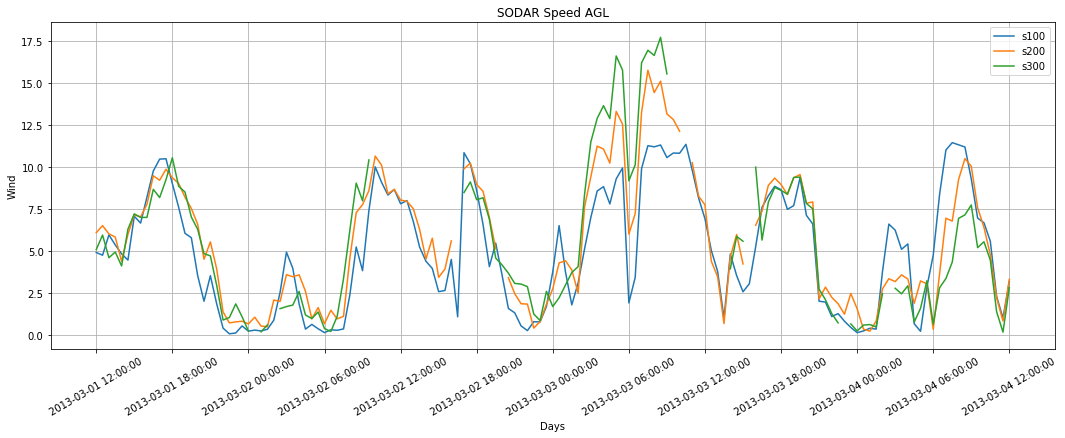

In [17]:
import pandas as pd
fig = plt.figure(figsize=[18,6])

plt.plot(s100, label='s100')
plt.plot(s200, label='s200')
plt.plot(s300, label='s300')

plt.ylabel('Wind')
plt.xlabel('Days')

plt.grid(True)
plt.legend()
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.title('SODAR Speed AGL')
figname='wrf_spd_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

In [18]:
sodss = sp['2013-03-01 12:00':'2013-03-04 12:00'];
sodtv = tv['2013-03-01 12:00':'2013-03-04 12:00'];
sodss = sodss.T.iloc[:38,:]
sodtv = sodtv.T.iloc[:38,:]


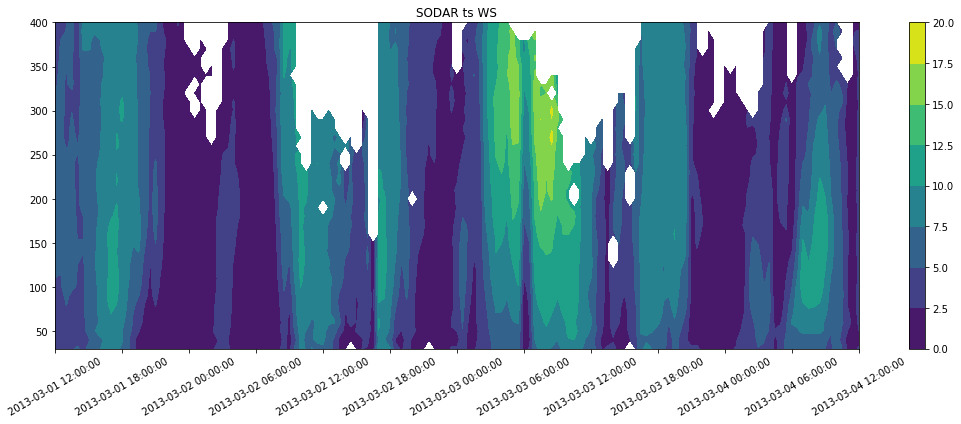

In [19]:
plt.figure(figsize=(18,6))
cont = plt.contourf(sodss)
plt.colorbar(cont)
plt.yticks(np.arange(2,38,5), np.arange(50,401,50));
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.title('SODAR ts WS')
figname='SODAR_ts_WS_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

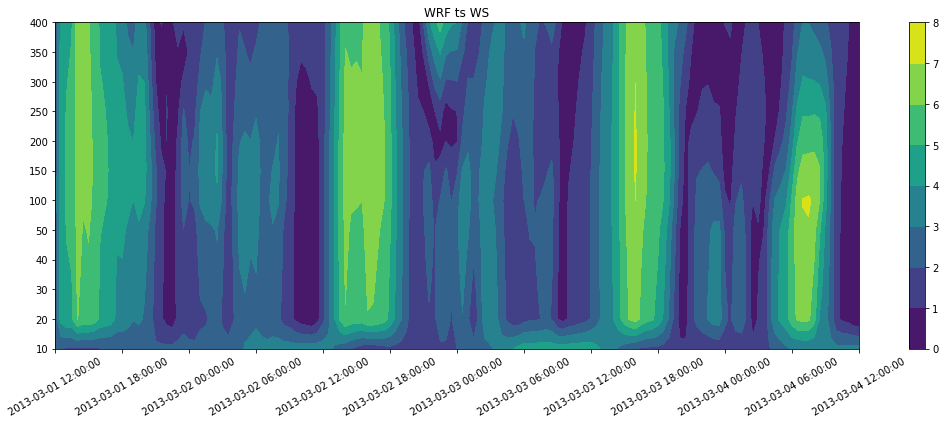

In [20]:
plt.figure(figsize=(18,6))
cont = plt.contourf(wrfuv2)
plt.colorbar(cont)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)
#plt.yticks(np.arange(2,10,1), np.arange(50,401,50));
plt.yticks(np.arange(0,12,1), [10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]);

plt.title('WRF ts WS')
figname='WRF_ts_WS_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

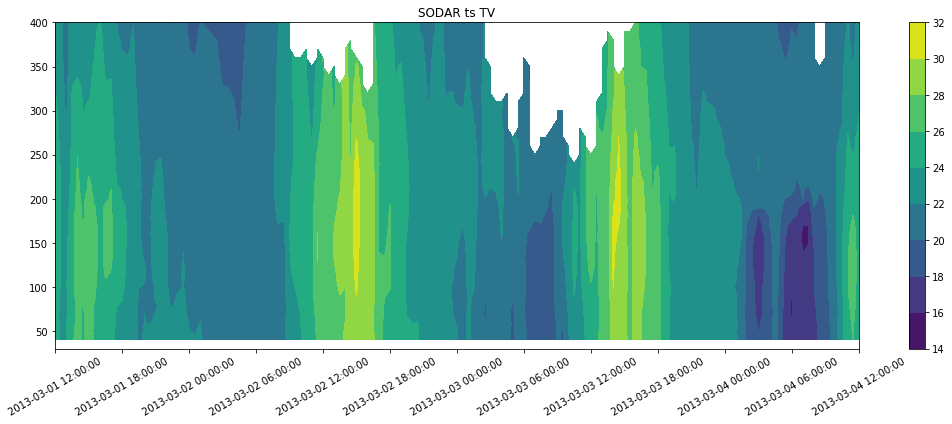

In [21]:
plt.figure(figsize=(18,6))
cont = plt.contourf(sodtv)
plt.colorbar(cont)
plt.yticks(np.arange(2,38,5), np.arange(50,401,50));
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30)

plt.title('SODAR ts TV')
figname='WRF_ts_TV_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

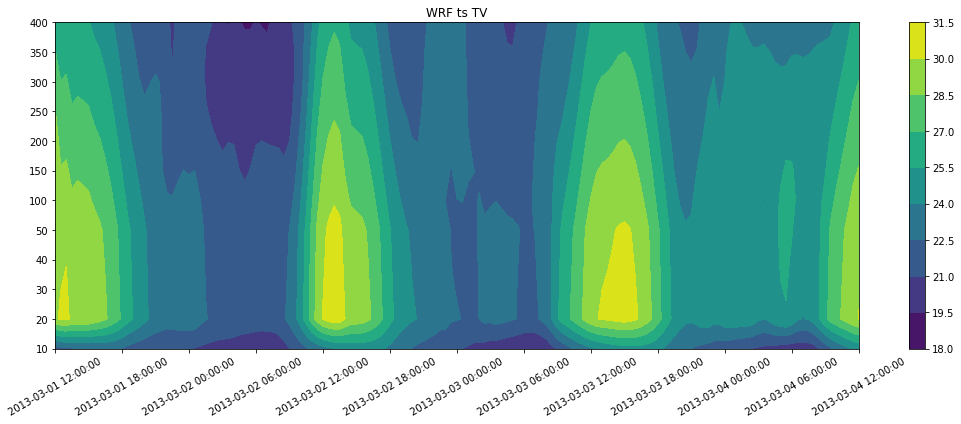

In [22]:
plt.figure(figsize=(18,6))
cont = plt.contourf(wrftv2)
plt.colorbar(cont)
plt.xticks(np.arange(0,timelabel.size,12),timelabel[::12], rotation=30);
plt.yticks(np.arange(0,12,1), [10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]);

plt.title('WRF ts TV')
figname='WRF_ts_TV_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

In [23]:
tt = 68
ll = 2
str(wrftimes[tt])
# interp_uv.shape  (433, 11, 119, 119)
# interp_levels = [.020, .030, .040, .050, .100, .150, .200, .250, .300, .350, .400]
uvwrf = interp_uv[tt,ll,:,:]
wdwrf = interp_wdir[tt,ll,:,:]
Twrf = interp_uv[tt,ll,:,:]
Pwrf = getvar(ds, "p", units='hPa', timeidx=tt)[0,:,:]
print(wrftimes[tt])


2013-03-02 22:00:00


2013-03-02 22:00:00


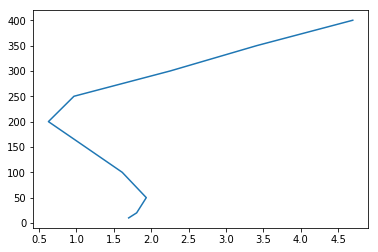

In [24]:
tt=68
print(wrftimes[tt])
plt.plot([w10[tt], w20[tt], w30[tt], w40[tt], w50[tt], w100[tt],
          w150[tt], w200[tt], w250[tt], w300[tt], w350[tt], w400[tt]], 
         [10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]);

In [26]:
lats = getvar(ds, "lat", timeidx=20)[:,0]
lons = getvar(ds, "lon", timeidx=20)[0,:]

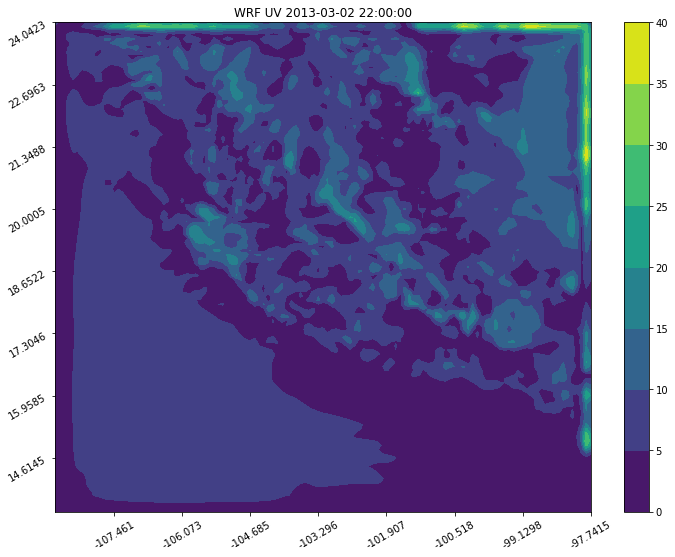

In [27]:
plt.figure(figsize=(12,9))

cbar = plt.contourf(uvwrf)
plt.colorbar(cbar)
plt.xticks(np.arange(13,119,15),lons[::15].values, rotation=30);
plt.yticks(np.arange(13,119,15), lats[::15].values, rotation=30);

plt.title('WRF UV '+str(wrftimes[tt]))
figname='WRF_UV_'+str(wrftimes[tt])+'_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

In [ ]:
plt.figure(figsize=(12,9))
cbar = plt.contourf(uvwrf*np.cos(wdwrf))
plt.colorbar(cbar)
plt.xticks(np.arange(13,119,15),lons[::15].values, rotation=30);
plt.yticks(np.arange(13,119,15), lats[::15].values, rotation=30);

plt.title('WRF V '+str(wrftimes[tt]))
figname='WRF_V_'+str(wrftimes[tt])+'_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

In [ ]:
plt.figure(figsize=(12,9))
cbar = plt.contourf(uvwrf*np.sin(wdwrf))
plt.colorbar(cbar)
plt.xticks(np.arange(13,119,15),lons[::15].values, rotation=30);
plt.yticks(np.arange(13,119,15), lats[::15].values, rotation=30);

plt.title('WRF U '+str(wrftimes[tt]))
figname='WRF_U_'+str(wrftimes[tt])+'_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

In [ ]:
plt.figure(figsize=(12,9))
cbar = plt.contourf(Pwrf)
plt.colorbar(cbar)
plt.xticks(np.arange(13,119,15),lats[::15].values, rotation=30);
plt.yticks(np.arange(13,119,15), lons[::15].values, rotation=30);

plt.title('WRF P hPa '+str(wrftimes[tt]))
figname='WRF_P_'+str(wrftimes[tt])+'_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)

In [ ]:
plt.figure(figsize=(12,9))

cbar = plt.contourf(Twrf)
plt.colorbar(cbar)
clab = plt.contour(Pwrf)
plt.clabel(clab, clab.levels[::2], fontsize=10, colors='w')
plt.xticks(np.arange(13,119,15),lats[::15].values, rotation=30);
plt.yticks(np.arange(13,119,15), lons[::15].values, rotation=30);

plt.title('WRF TV '+str(wrftimes[tt]))
figname='WRF_TV_'+str(wrftimes[tt])+'_'
plt.savefig(dirs+figname+'_'+rtimes+'_'+run+'.png', dpi=300)